# Pymaceuticals Inc. Analysis

### Observable Trends
Compared to Infubinol, Ketapril, and Placebo, the drug efficacy of Capomulin can be deduced by the following observable trends derived the data analysis:
1. The observable trend for the placebo compared to the other drugs supports Capomulin's true efficacy against squamous cell carcinoma (SCC) in mice.
2. Capomulin's average decrease in tumor volume (mm3) by 19.48% and comparatively higher survival rate makes it a better treatment drug choice in mice.
3. Capomulin's effectiveness in decreasing tumor volume is correlated with a comparatively higher survival rate. However, the number of metastatic sites still continued to increase throughtout the treatment period. Despite capomulin's inability to stop the continuous growth of metastatic sites, capomulin's affect on the mouse's survival rate supports it's possible future use as a feature for future drug studies and drug designs.

In [1]:
#import the modules used in this analysis
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [2]:
#load and merge two datasets: Clinical Trial Data and Mouse Drug Data
clinicalTrial_data = pd.read_csv("clinicaltrial_data.csv")
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")

#calculate the number of unique mouses treated 
num_unique_mouse = len(clinicalTrial_data["Mouse ID"].unique())
print(f"Total of {num_unique_mouse} unique mouses were treated in the cancer drug treatment study.")

Total of 249 unique mouses were treated in the cancer drug treatment study.


In [3]:
#merge datasets and sort values by treatment time and metastatic sites
merged_df = pd.merge(clinicalTrial_data, mouse_drug_data, how="left", on="Mouse ID")

#sort dataframe at treatment time and metastatic sites to starting from initial
df = merged_df.sort_values(by=["Timepoint", "Metastatic Sites"])

#sample view of the constructed dataframe
df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


# Tumor Response to Treatment

In [4]:
#--------------------------------------------------


#Creating a scatter plot that shows how the tumor volume  
#changes over time for each treatment


#--------------------------------------------------



In [5]:
#manipulate dataframe down to displaying on "Drug", "Timepoint", and
#"Tumor Volume (mm3)" data values
filtered1_df = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]


#manipulate dataframe to display average Tumor Volume(mm3)
#for each drug at each treatment time
a = filtered1_df.groupby(["Drug", "Timepoint"]).mean()

#sample display of the constructed dataframe
a.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [6]:
#reset index to bring drug and timepoint indices back into dataframe as columns
reset_a = a.reset_index()

#construct dataframe as tumor volume (mm3) series with multiindex
series = pd.Series(list(a["Tumor Volume (mm3)"]), index=[reset_a["Drug"], reset_a["Timepoint"]])

#use unstack() and T method to construct desired dataframe 
#displays treatment time as index, and treatment drug as column
#to see the change in tumor volume over the treatment period
unstacked_drug_timepoint_df = series.unstack().T
unstacked_drug_timepoint_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
#reset index for dataframe to use timepoint as x-axis in chart 
unstacked_drug_timepoint = unstacked_drug_timepoint_df.reset_index()
unstacked_drug_timepoint

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [8]:
#below is to calculate the standard error for each time point for each drug treatment desired for analysis
#dataframe displaying "Drug", "Timepoint", and "Tumor Volume (mm3)" data values
filtered2_df = filtered1_df.sort_values(by=["Drug", "Timepoint"])


#function to create dataframe to display specific treatment drug
def volume_df(df, drug_choice):
    df = df.loc[df["Drug"]==drug_choice]
    del df["Drug"]
    return df


#function to create standard error for each treatment time 
def semArray(df):
    err = []
    for x in range(0, 50, 5):
        semSeries = df.loc[df["Timepoint"]==x].sem()
        err.append(semSeries["Tumor Volume (mm3)"])
    return err


#calculate the standard of error for each time period
capomulin_err = semArray(volume_df(filtered2_df, "Capomulin"))
infubinol_err = semArray(volume_df(filtered2_df, "Infubinol"))
ketapril_err = semArray(volume_df(filtered2_df, "Ketapril"))
placebo_err = semArray(volume_df(filtered2_df, "Placebo"))



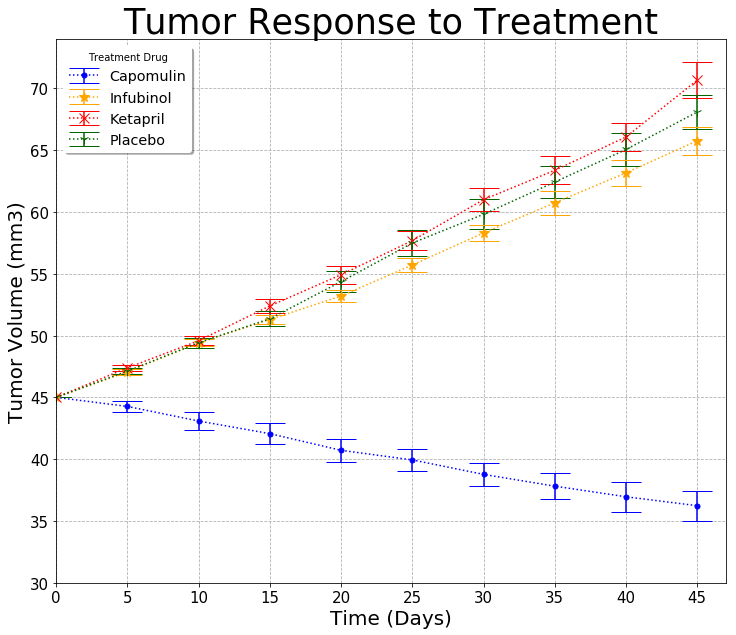

In [195]:

#set a specific size for the chart
plt.figure(figsize=(12,10))

#plot scttor plot with error bars showing the standard error for each point
plt.errorbar(x="Timepoint", y="Capomulin", data=unstacked_drug_timepoint, yerr=capomulin_err, 
             color = 'blue', marker='o', ms=5, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Infubinol", data=unstacked_drug_timepoint, yerr=infubinol_err, 
             color = 'orange', marker='*', ms=10, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Ketapril", data=unstacked_drug_timepoint, yerr=ketapril_err, 
             color = 'red', marker='x', ms=10, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Placebo", data=unstacked_drug_timepoint, yerr=placebo_err, 
             color = 'darkgreen', marker="1", ms=10, linestyle=':', capsize=15)

#display gridlines on chart
plt.grid(linestyle="--")

#add title to chart
plt.title("Tumor Response to Treatment", size=35)

#adjust x-axis and y-axis of chart
plt.xticks(np.arange(0, 50, step=5), fontsize=15)
plt.yticks(np.arange(30, 75, step=5), fontsize=15)
plt.xlim(0,47)

#add x-axis and y-axis labels, and a legend
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)
plt.legend(loc='best', shadow=True, title="Treatment Drug", fontsize='x-large')

# Metastatic Response to Treatment

In [10]:
#--------------------------------------------------

#Creating a scatter plot that shows how the number of metastatic 
#(cancer spreading) sites changes over time for each treatment

#--------------------------------------------------


#filter dataframe to display only treatment drug, treatment time, 
#and number of metastatic sites
filtered_metastatic = df[["Drug", "Timepoint", "Metastatic Sites"]]

#calculate the average metastatic sites for each treatment time period for each treatment drug
grouped_filtered_metastatic = filtered_metastatic.groupby(["Drug", "Timepoint"]).mean()

#sample display of dataframe of average metastatic sites for each drug treatment
grouped_filtered_metastatic.head(10)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [11]:
#manipulate dataframe to show the change in metastatic sites over treatment period
transposed_metastatic = grouped_filtered_metastatic.unstack().T
transposed_metastatic

Drug                        Capomulin  Ceftamin  Infubinol  Ketapril  \
                 Timepoint                                             
Metastatic Sites 0           0.000000  0.000000   0.000000  0.000000   
                 5           0.160000  0.380952   0.280000  0.304348   
                 10          0.320000  0.600000   0.666667  0.590909   
                 15          0.375000  0.789474   0.904762  0.842105   
                 20          0.652174  1.111111   1.050000  1.210526   
                 25          0.818182  1.500000   1.277778  1.631579   
                 30          1.090909  1.937500   1.588235  2.055556   
                 35          1.181818  2.071429   1.666667  2.294118   
                 40          1.380952  2.357143   2.100000  2.733333   
                 45          1.476190  2.692308   2.111111  3.363636   

Drug                        Naftisol   Placebo  Propriva  Ramicane  Stelasyn  \
                 Timepoint                                                     
Metastatic Sites 0          0.000000  0.000000  0.000000  0.000000  0.000000   
                 5          0.260870  0.375000  0.320000  0.120000  0.240000   
                 10         0.523810  0.833333  0.565217  0.250000  0.478261   
                 15         0.857143  1.250000  0.764706  0.333333  0.782609   
                 20         1.150000  1.526316  1.000000  0.347826  0.952381   
                 25         1.500000  1.941176  1.357143  0.652174  1.157895   
                 30         2.066667  2.266667  1.615385  0.782609  1.388889   
                 35         2.266667  2.642857  2.300000  0.952381  1.562500   
                 40         2.466667  3.166667  2.777778  1.100000  1.583333   
                 45         2.538462  3.272727  2.571429  1.250000  1.727273   

Drug                        Zoniferol  
                 Timepoint             
Metastatic Sites 0           0.000000  
                 5           0.166667  
                 10          0.500000  
                 15          0.809524  
                 20          1.294118  
                 25          1.687500  
                 30          1.933333  
                 35          2.285714  
                 40          2.785714  
                 45          3.071429

In [12]:
#manipulate previous dataframe, so that timepoint can be assigned as x-axis
transposed_metastatic = transposed_metastatic.reset_index()
del transposed_metastatic["level_0"]
meta_size_df = transposed_metastatic

#display dataframe
meta_size_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [13]:
#below is to calculate the standard error for each time point for each drug treatment desired for analysis
#dataframe displaying "Drug", "Timepoint", and "Metastatic Sites" data values
filtered_metastatic = filtered_metastatic.sort_values(by=["Drug", "Timepoint"])
filtered_metastatic

#function to create dataframe to display specific treatment drug
def volume_df(df, drug_choice):
    df = df.loc[df["Drug"]==drug_choice]
    del df["Drug"]
    return df


#function to create standard error for each treatment time 
def semArray(df):
    err = []
    for x in range(0, 50, 5):
        semSeries = df.loc[df["Timepoint"]==x].sem()
        err.append(semSeries["Metastatic Sites"])
    return err


#calculate the standard of error for each time period
capomulin_meta_err = semArray(volume_df(filtered_metastatic, "Capomulin"))
infubinol_meta_err = semArray(volume_df(filtered_metastatic, "Infubinol"))
ketapril_meta_err = semArray(volume_df(filtered_metastatic, "Ketapril"))
placebo_meta_err = semArray(volume_df(filtered_metastatic, "Placebo"))



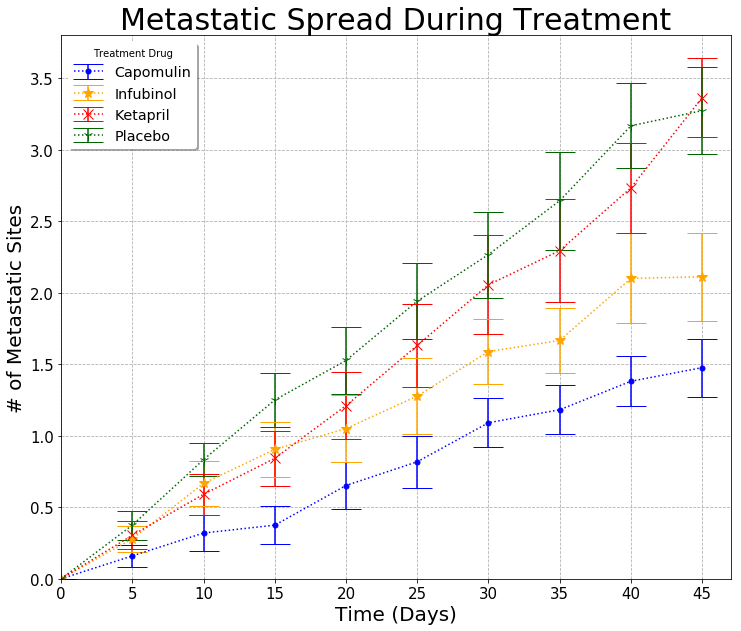

In [204]:
#set a specific size for the chart
plt.figure(figsize=(12,10))

#plot scattor plot with errorbars displaying the standard of error for
#metastatic sites for each treatment drugs: Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(x="Timepoint", y="Capomulin", data=meta_size_df, yerr=capomulin_meta_err, 
             color = 'blue', marker='o', ms=5, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Infubinol", data=meta_size_df, yerr=infubinol_meta_err, 
             color = 'orange', marker='*', ms=10, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Ketapril", data=meta_size_df, yerr=ketapril_meta_err, 
             color = 'red', marker='x', ms=10, linestyle=':', capsize=15)
plt.errorbar(x="Timepoint", y="Placebo", data=meta_size_df, yerr=placebo_meta_err, 
             color = 'darkgreen', marker="1", ms=10, linestyle=':', capsize=15)

#add gridlines to chart
plt.grid(linestyle="--")

#add title to chart
plt.title("Metastatic Spread During Treatment", size=30)

#format x-axis and y-axis 
plt.xticks(np.arange(0, 50, step=5), fontsize=15)
plt.yticks(np.arange(0, 4.0, step=0.5), fontsize=15)
plt.xlim(0,47)
plt.ylim(0,3.8)
#add labels to x-axis and y-axis, and add legend
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("# of Metastatic Sites", fontsize=20)
plt.legend(loc='best', shadow=True, title="Treatment Drug", fontsize='x-large')

# Survival Rates

In [15]:
#--------------------------------------------------

#Creating a scatter plot that shows the number of mice still 
#alive through the course of treatment (Survival Rate)

#--------------------------------------------------

#use groupby() method to filter and manipulate dataframe to isolate 
#the mouse count values throughout over treatment time period for each treatment drug
mouse_count = df[["Drug", "Timepoint", "Mouse ID"]].groupby(["Drug","Timepoint"]).count()

#sample view of the manipulated dataframe
mouse_count.head(10)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21

In [16]:
#manipulate dataframe to show a dataframe comparing each treatment drug's
#mouse count
unstack_mouse_count = mouse_count.unstack().T
mouse_df = unstack_mouse_count.reset_index()
del mouse_df["level_0"]
mouse_df = mouse_df.set_index("Timepoint")

#display manipulated dataframe
mouse_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [17]:
#array of initial mouse count values to be used to calculate the percentage of mouse count
initial_mouse_count = mouse_df.T[0].values

#converting column data values to the percentage of mouse count  
survival_rate_df = mouse_df / initial_mouse_count * 100

#reset the timepoint index to be used as the x-axis in charting
survival_rate_df = survival_rate_df.reset_index()
survival_rate_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,26.923077,80.0,42.307692,56.0


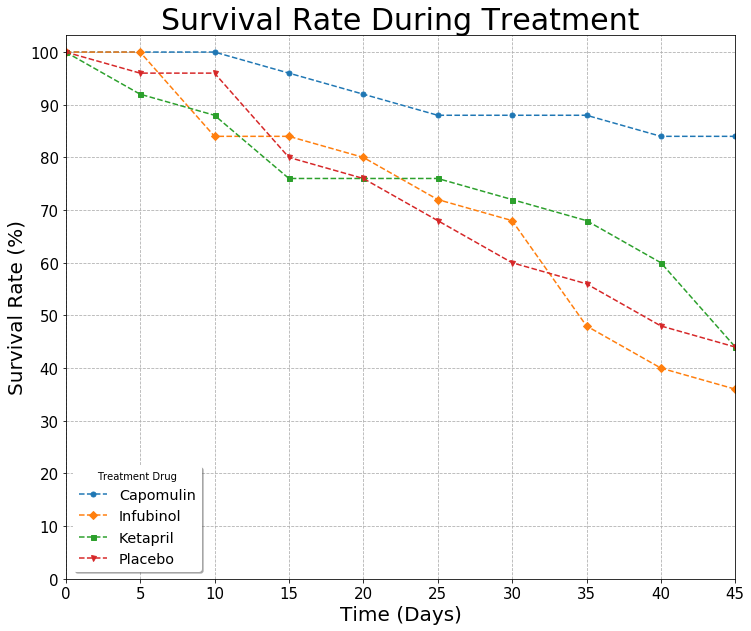

In [203]:
#set a specific size for the chart
plt.figure(figsize=(12,10))


#chart each treatment drug for Capomulin, Infubinol, Ketapril, Placebo on same graph
plt.errorbar(x="Timepoint", y="Capomulin", data=survival_rate_df, ms=5, marker='o', linestyle='--')
plt.errorbar(x="Timepoint", y="Infubinol", data=survival_rate_df, ms=5, marker='D', linestyle='--')
plt.errorbar(x="Timepoint", y="Ketapril", data=survival_rate_df, ms=5, marker='s', linestyle='--')
plt.errorbar(x="Timepoint", y="Placebo", data=survival_rate_df, ms=5, marker="v", linestyle='--')
           
#adding gridlines to the chart
plt.grid(linestyle="--")

#labelling the chart title
plt.title("Survival Rate During Treatment", size=30)

#assigning values for ticks on x-axis and y-axis
plt.xticks(np.arange(0, 50, step=5), fontsize=15)
plt.yticks(np.arange(0, 110, step=10), fontsize=15)

#label the x-axis and y-axis
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("Survival Rate (%)", fontsize=20)
plt.xlim(0,45)
#construct legend
plt.legend(loc='best', title="Treatment Drug", shadow=True, fontsize='x-large')


# Summary Bar Graph


In [19]:
#--------------------------------------------------

#Creating a bar graph that compares the total % tumor 
#volume change for each drug across the full 45 days.

#--------------------------------------------------

In [20]:
#starting tumor volume for each treatment drug
starting_volume = unstacked_drug_timepoint_df.loc[0,:]


#dataframe showing the change in tumor volume over each treatment period
unstacked_drug_timepoint_df.diff()


#starting tumor volume for each treatment drug
starting_volume = unstacked_drug_timepoint_df.loc[0,:]

#replace NaN values in treatment period 0 with starting volume values 
unstacked_drug_timepoint.fillna(value = starting_volume)



unstacked_drug_timepoint.fillna(value = starting_volume)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [21]:
#calculate the total change in volume throughout treatment period
change_in_volume = unstacked_drug_timepoint_df.diff().sum()
change_in_volume

Drug
Capomulin    -8.763886
Ceftamin     19.132421
Infubinol    20.755562
Ketapril     25.662958
Naftisol     24.265506
Placebo      23.084082
Propriva     21.258529
Ramicane    -10.044405
Stelasyn     23.438310
Zoniferol    20.960888
dtype: float64

In [22]:
#final average tumor volumes for each treatment drug
final_volume = (starting_volume + change_in_volume)
#display series
final_volume

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
dtype: float64

In [23]:
#calculate the total tumor volume percent change
total_volume_percent_change = ((final_volume / starting_volume) - 1) * 100

#display series
total_volume_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
#rename series name 
total_volume_percent_change = total_volume_percent_change.rename("% Tumor Volume Change")

#filter series to show only Capomulin, Infubinol, Ketapril, and Placebo
final_df = total_volume_percent_change.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

#create dataframe to use column data values as axes in barplot chart
format_final_df = pd.DataFrame(final_df).reset_index()

#display created dataframe
format_final_df


,Drug,% Tumor Volume Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


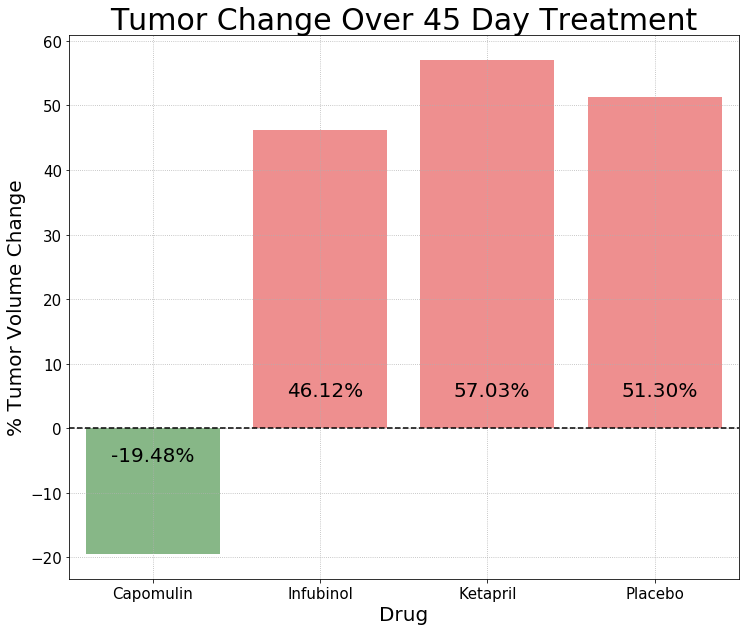

In [175]:
#array of %Tumor Volume Change
volume_percent = format_final_df["% Tumor Volume Change"].values


#function to color bar according to positive or negative % volume change
def coloringBars(list):
    colors = []
    for x in range(len(list)):
        if list[x] > 0:
            colors.append('red')
        else:
            colors.append('green')
    return colors
    
coloringBars(volume_percent)



#set a specific size for the chart
plt.figure(figsize=(12,10))

#create barplot for % Tumor Volume Change comparison for selected drugs
ax = sns.barplot(x="Drug", y="% Tumor Volume Change", 
                 data=format_final_df, palette=colors, alpha = 0.5)

#annotate barplot chart with percent values
ax.text(-0.25, -5, '{:2.2f}%'.format(volume_percent[0]), fontsize=20)
ax.text(0.8, 5, '{:2.2f}%'.format(volume_percent[1]), fontsize=20)
ax.text(1.8, 5, '{:2.2f}%'.format(volume_percent[2]), fontsize=20)
ax.text(2.8, 5, '{:2.2f}%'.format(volume_percent[3]), fontsize=20)

#format barplot
plt.title("Tumor Change Over 45 Day Treatment", size=30)
plt.grid(linestyle="dotted")
plt.hlines(y=0, xmin=-10, xmax=10, linestyles="dashed")

#format barplot axes and labels
plt.xlabel("Drug", fontsize=20)
plt.ylabel("% Tumor Volume Change", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#display barplot
plt.show()

